In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

mpl.rc('font',**{'family':'serif','serif':['serif']})
mpl.rc('text', usetex=True)
import fitsio as fio

import copy

import xpipe.tools.catalogs as catalogs
import xpipe.paths as paths
import xpipe.xhandle.parbins as parbins
import xpipe.xhandle.xwrap as xwrap
import xpipe.tools.selector as selector
import xpipe.xhandle.shearops as shearops
import xpipe.xhandle.pzboost as pzboost
import xpipe.tools.y3_sompz as sompz
import xpipe.tools.mass as mass
import xpipe.tools.visual as visual


from importlib import reload
import pickle


import astropy.cosmology as cosmology
# this is just the default cosmology
cosmo = cosmology.FlatLambdaCDM(Om0=0.3, H0=70)

# we make sure the correct config file is loaded here, it will let us automatically now what type of files 
# were / will be produced, and where they will be placed
paths.update_params("/home/moon/vargatn/DES/PROJECTS/xpipe/settings/params_y3lwb_meta.yml")

reading DEFAULTS from default_params.yml
updating params from: /home/moon/vargatn/DES/PROJECTS/xpipe/settings/params.yml
updating params from: /home/moon/vargatn/DES/PROJECTS/xpipe/settings/params_y3rm-stack_meta.yml
updating params from: /home/moon/vargatn/DES/PROJECTS/xpipe/settings/params_y3lwb_meta.yml

***********************

running in full mode

***********************



In [3]:
fname = "/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/lenscat/LWB_DESY3_ALL.fits"
allgal = fio.read(fname)

In [4]:
fname = "/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/lenscat/LWB_DESY3_ALL_rand.fits"
allrand = fio.read(fname)

In [5]:
main_file_path = "/e/ocean1/users/vargatn/DESY3/Y3_mastercat_03_31_20.h5"
src = sompz.sompz_reader(main_file_path)
src.build_lookup()

In [6]:
flist, flist_jk, rlist, rlist_jk = parbins.get_file_lists(paths.params, paths.dirpaths)

In [7]:
ms_opt=[np.array([-0.02,-0.024,-0.037]),np.array([-0.024,-0.037]),np.array([-0.024,-0.037]),np.array([-0.037,])]
ms=[np.array([-0.024,-0.037]),np.array([-0.024,-0.037]),np.array([-0.024,-0.037]),np.array([-0.024,-0.037])]
  ## give it this 
optsbins=[(1,2,3),(2,3),(2,3),(3,)]

# now extract the len weights, these are not used yet we can pass them on the post-processing stage
weights = pd.DataFrame()
weights["ww"] = allgal["WSYS"]
weights["ID"] = allgal["ID"]

ACP_optms = []
for i, fname in enumerate(flist):
#     print(ms[i],optsbins[i])
    mfac_opt=1/(1+ms_opt[i])
#     mfac=1/(1+ms[i])
#     print(mfac, mfac_opt)
    
#     ACP = shearops.AutoCalibrateProfile([fname,], flist_jk[i], src, xlims=(0.01, 30), sbins=(2, 3))
#     ACP.get_profiles(ismeta=True, id_key="ID", z_key="Z", weights=weights) #
#     ACPs.append(ACP)
    
#     ACP = shearops.AutoCalibrateProfile([fname,], flist_jk[i], src, xlims=(0.01, 30), sbins=(2, 3))
#     ACP.get_profiles(ismeta=True, id_key="ID", z_key="Z", weights=weights, mfactor_sbins=mfac) #
#     ACP_ms.append(ACP)
#     
    ACP = shearops.AutoCalibrateProfile([fname,], flist_jk[i], src, xlims=(0.01, 30), sbins=optsbins[i])
    ACP.get_profiles(ismeta=True, id_key="ID", z_key="Z", weights=weights, mfactor_sbins=mfac_opt) #
    ACP_optms.append(ACP)

loading source bin 1
loading source bin 2
loading source bin 3
/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/lwb-y3-lowz+cmass_v02/lwb-y3-lowz+cmass_v02_y1clust_qbin-0.fits
loading source bin 2
loading source bin 3
/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/lwb-y3-lowz+cmass_v02/lwb-y3-lowz+cmass_v02_y1clust_qbin-1.fits
loading source bin 2
loading source bin 3
/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/lwb-y3-lowz+cmass_v02/lwb-y3-lowz+cmass_v02_y1clust_qbin-2.fits
loading source bin 3
/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/lwb-y3-lowz+cmass_v02/lwb-y3-lowz+cmass_v02_y1clust_qbin-3.fits


Text(0, 0.5, '$\\Delta\\Sigma$ [$M_\\odot  / pc^2$]')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


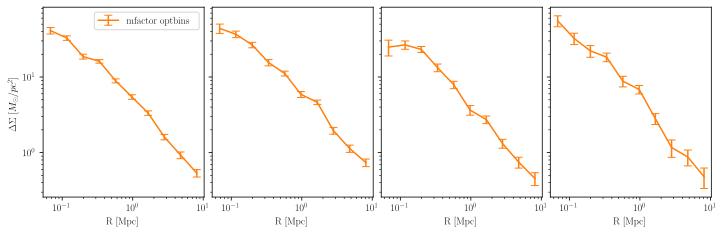

In [8]:
fig, axarr = plt.subplots(ncols=4, figsize=(12, 3.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in np.arange(4):

    prof = ACP_optms[i]
    axarr[i].errorbar(prof.rr, prof.dst, yerr=prof.dst_err, capsize=4, color="C1", ls="-",
                      label="mfactor optbins")
    
    axarr[i].set_xlabel("R [Mpc]")
    axarr[i].set_xscale("log")
    axarr[i].set_yscale("log")
    
axarr[0].legend()
    
    
axarr[0].set_ylabel("$\Delta\Sigma$ [$M_\odot  / pc^2$]")

# fig.savefig("LWB_Deltasigma_sanity_check.png", bbox_inches="tight")

In [9]:
# now extract the len weights, these are not used yet we can pass them on the post-processing stage
# weights = pd.DataFrame()
# weights["ww"] = allrand["WSYS"]
# weights["ID"] = allrand["ID"]

ACP_optm_rands = []
for i, rname in enumerate(rlist):
#     print(ms[i],optsbins[i])
    mfac_opt=1/(1+ms_opt[i])
#     mfac=1/(1+ms[i])
#     print(mfac, mfac_opt)
    
#     ACP = shearops.AutoCalibrateProfile([fname,], flist_jk[i], src, xlims=(0.01, 30), sbins=(2, 3))
#     ACP.get_profiles(ismeta=True, id_key="ID", z_key="Z", weights=weights) #
#     ACPs.append(ACP)
    
#     ACP = shearops.AutoCalibrateProfile([fname,], flist_jk[i], src, xlims=(0.01, 30), sbins=(2, 3))
#     ACP.get_profiles(ismeta=True, id_key="ID", z_key="Z", weights=weights, mfactor_sbins=mfac) #
#     ACP_ms.append(ACP)
#     
    ACP = shearops.AutoCalibrateProfile([rname,], rlist_jk[i], src, xlims=(0.01, 30), sbins=optsbins[i])
    ACP.get_profiles(ismeta=True, id_key="ID", z_key="Z", mfactor_sbins=mfac_opt) #
    ACP_optm_rands.append(ACP)

loading source bin 1
loading source bin 2
loading source bin 3
/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/lwb-y3-lowz+cmass_v02/lwb-y3-lowz+cmass_v02_y1rand_qbin-0.fits
loading source bin 2
loading source bin 3
/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/lwb-y3-lowz+cmass_v02/lwb-y3-lowz+cmass_v02_y1rand_qbin-1.fits
loading source bin 2
loading source bin 3
/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/lwb-y3-lowz+cmass_v02/lwb-y3-lowz+cmass_v02_y1rand_qbin-2.fits
loading source bin 3
/e/ocean1/users/vargatn/DES/DES_Y3A2_cluster/data/xshear_in/lwb-y3-lowz+cmass_v02/lwb-y3-lowz+cmass_v02_y1rand_qbin-3.fits


In [14]:
prof1 = copy.copy(ACP_optms[0])
prof2 = copy.copy(ACP_optm_rands[0])
prof1.composite(prof2, operation="-")

In [15]:
prof1

In [36]:
ACP_optm_rands[0].scinvs

array([0.00020426, 0.00028487, 0.00030714])

In [37]:
ACP_optms[0].scinvs

array([0.00020426, 0.00028487, 0.00030714])

Text(0, 0.5, '$R\\times\\Delta\\Sigma$ [$M_\\odot  / pc$]')

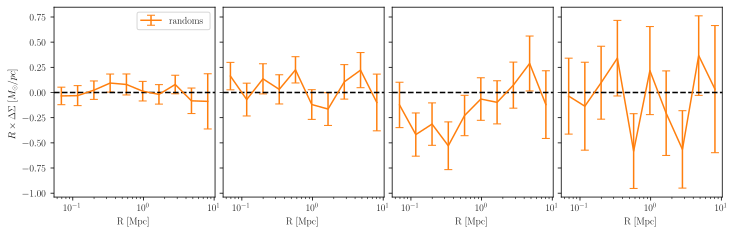

In [43]:
fig, axarr = plt.subplots(ncols=4, figsize=(12, 3.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in np.arange(4):


    
#     prof = ACP_optms[i]
#     axarr[i].errorbar(prof.rr, prof.dst, yerr=prof.dst_err, capsize=4, color="C0", ls="-",
#                       label="lenses")    
    
    prof = ACP_optm_rands[i]
    axarr[i].errorbar(prof.rr, prof.rr * prof.dst, yerr=prof.rr * prof.dst_err, capsize=4, color="C1", ls="-",
                      label="randoms")
    
#     prof1 = copy.copy(ACP_optms[i])
#     prof2 = copy.copy(ACP_optm_rands[i])
#     prof1.composite(prof2, operation="-")
#     axarr[i].errorbar(prof1.rr, prof1.dst, yerr=prof1.dst_err, capsize=4, color="C2", ls="-",
#                       label="subtracted sbin-wise")
    
#     prof1 = copy.copy(ACP_optms[i].profile)
#     prof2 = copy.copy(ACP_optm_rands[i].profile)
# #     prof = prof1.profile.composite
#     prof1.composite(prof2, operation="-")
#     axarr[i].errorbar(prof1.rr, prof1.dst, yerr=prof1.dst_err, capsize=4, color="C3", ls="--",
#                       label="subtracted stack-wise")
    
    
    axarr[i].set_xlabel("R [Mpc]")
    axarr[i].set_xscale("log")
#     axarr[i].set_yscale("log")
    axarr[i].axhline(0, ls="--", color="black")
axarr[0].legend()

axarr[0].set_ylabel("$R\\times\Delta\Sigma$ [$M_\odot  / pc$]")

In [45]:
ACP_optms[0].dst

array([41.07649212, 32.79639468, 18.6268376 , 16.10888016,  8.89528758,
        5.4519419 ,  3.33722155,  1.60916315,  0.92603435,  0.53590907])

Text(0, 0.5, '$\\Delta\\Sigma$ [$M_\\odot  / pc^2$]')

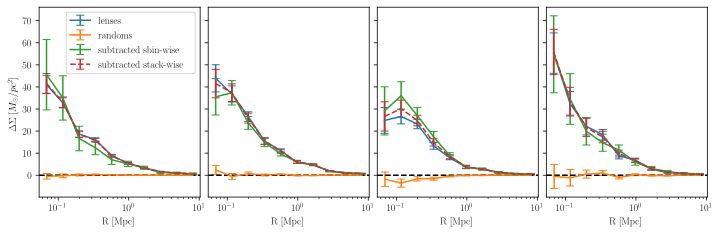

In [20]:
fig, axarr = plt.subplots(ncols=4, figsize=(12, 3.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in np.arange(4):


    
    prof = ACP_optms[i]
    axarr[i].errorbar(prof.rr, prof.dst, yerr=prof.dst_err, capsize=4, color="C0", ls="-",
                      label="lenses")    
    
    prof = ACP_optm_rands[i]
    axarr[i].errorbar(prof.rr, prof.dst, yerr=prof.dst_err, capsize=4, color="C1", ls="-",
                      label="randoms")
    
    prof1 = copy.copy(ACP_optms[i])
    prof2 = copy.copy(ACP_optm_rands[i])
    prof1.composite(prof2, operation="-")
    axarr[i].errorbar(prof1.rr, prof1.dst, yerr=prof1.dst_err, capsize=4, color="C2", ls="-",
                      label="subtracted sbin-wise")
    
    prof1 = copy.copy(ACP_optms[i].profile)
    prof2 = copy.copy(ACP_optm_rands[i].profile)
#     prof = prof1.profile.composite
    prof1.composite(prof2, operation="-")
    axarr[i].errorbar(prof1.rr, prof1.dst, yerr=prof1.dst_err, capsize=4, color="C3", ls="--",
                      label="subtracted stack-wise")
    
    
    axarr[i].set_xlabel("R [Mpc]")
    axarr[i].set_xscale("log")
#     axarr[i].set_yscale("log")
    axarr[i].axhline(0, ls="--", color="black")
axarr[0].legend()

axarr[0].set_ylabel("$\Delta\Sigma$ [$M_\odot  / pc^2$]")

Text(0, 0.5, '$\\Delta\\Sigma$ [$M_\\odot  / pc^2$]')

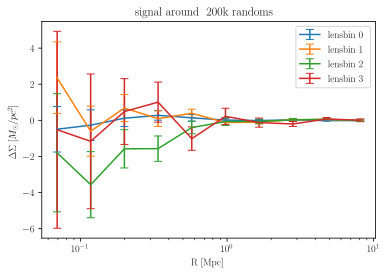

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in np.arange(4):
    prof = ACP_optm_rands[i]
    ax.errorbar(prof.rr, prof.dst, yerr=prof.dst_err, capsize=4, ls="-",
                      label="lensbin "+str(i))
ax.legend()
ax.set_xscale("log")

ax.set_xlabel("R [Mpc]")
ax.set_title("signal around ~200k randoms ")   
    
ax.set_ylabel("$\Delta\Sigma$ [$M_\odot  / pc^2$]")

# Adding random corretion

In [22]:
ACP_subtracted = []
for i in np.arange(4):
    prof1 = copy.copy(ACP_optms[i])
    prof2 = copy.copy(ACP_optm_rands[i])
    prof1.composite(prof2, operation="-")
    
    ACP_subtracted.append(prof1)

In [26]:
# Then run this
optsbins=[(1, 2, 3),(2, 3),(2, 3),(3,)]
smbs = []
ACPs_boosted = []
for i in np.arange(4):
    print(i)
    # Load the pairs files pre-processed above
    smb = pzboost.SOMBoost(src, [flist_jk[i],], sbins=optsbins[i],
                           pairs_to_load="lwb-y3-lowz+cmass_v02_y1clust_optsbins_qbin-"+str(i)+"_pairs.h5")
    smb.prep_boost(bins_to_use=np.arange(10)) # these are the indices of the radial bins to be used
    smb.get_boost(npdf=9) # use the inner 9 radial bins (and the last as the reference PDF)
    smbs.append(smb)
    ACP = copy.copy(ACP_subtracted[i])
    ACP.add_boost(smb)
    ACPs_boosted.append(ACP)

0
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]
0 0
0 1


/home/moon/vargatn/anaconda3/envs/main3/lib/python3.8/site-packages/scipy/optimize/_lsq/common.py:453: RuntimeWarning: underflow encountered in nextafter
  x_new[lower_mask] = np.nextafter(lb[lower_mask], ub[lower_mask])
/home/moon/vargatn/DES/PROJECTS/xpipe/xpipe/xhandle/pzboost.py:975: RuntimeWarning: underflow encountered in multiply
  self.mixarr[i, :] = amps[i] * garr + (1. - amps[i]) * self.refpdf
/home/moon/vargatn/anaconda3/envs/main3/lib/python3.8/site-packages/scipy/optimize/_lsq/trf.py:263: RuntimeWarning: underflow encountered in multiply
  g_norm = norm(g * v, ord=np.inf)


0 2


/home/moon/vargatn/DES/PROJECTS/xpipe/xpipe/xhandle/shearops.py:989: RuntimeWarning: underflow encountered in multiply
  tmps.append(_amp * self.scinvs[i])


(9,)
1
1
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]
0 0
0 1
(9,)
1
2
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]
0 0
0 1
(9,)
1
3
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]
0 0
(9,)
1


Text(0, 0.5, '$\\Delta\\Sigma$ [$M_\\odot  / pc^2$]')

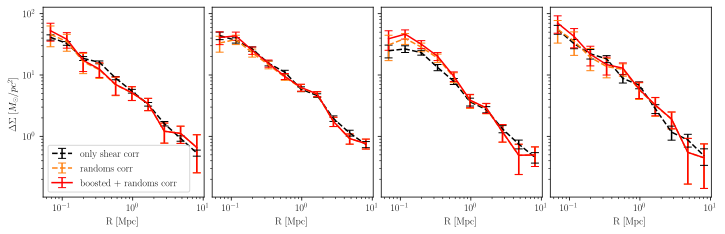

In [32]:
fig, axarr = plt.subplots(ncols=4, figsize=(12, 3.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in np.arange(4):

    prof = ACP_optms[i]
    axarr[i].errorbar(prof.rr, prof.dst, yerr=prof.dst_err, color="black", capsize=4, ls="--", label="only shear corr")
    
    prof = ACP_subtracted[i]
    axarr[i].errorbar(prof.rr, prof.dst, yerr=prof.dst_err, color="C1", capsize=4, ls="--", label="randoms corr")

    prof = ACPs_boosted[i]
    axarr[i].errorbar(prof.rr, prof.dst, yerr=prof.dst_err, color="red", capsize=4, label="boosted + randoms corr")
    
    axarr[i].set_xlabel("R [Mpc]")
    axarr[i].set_xscale("log")
    axarr[i].set_yscale("log")
    
axarr[0].legend()
    
axarr[0].set_ylabel("$\Delta\Sigma$ [$M_\odot  / pc^2$]")

Text(0, 0.5, '$\\Delta\\Sigma$ [$M_\\odot  / pc^2$]')

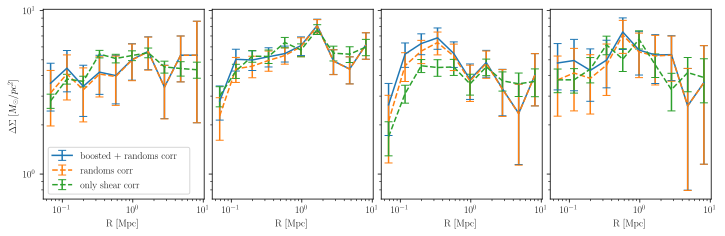

In [30]:
fig, axarr = plt.subplots(ncols=4, figsize=(12, 3.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

for i in np.arange(4):
    prof = ACPs_boosted[i]
    axarr[i].errorbar(prof.rr, prof.rr * prof.dst, yerr=prof.rr*prof.dst_err, capsize=4, label="boosted + randoms corr")
    
    prof = ACP_subtracted[i]
    axarr[i].errorbar(prof.rr, prof.rr*prof.dst, yerr=prof.rr*prof.dst_err, capsize=4, ls="--", label="randoms corr")
    
    prof = ACP_optms[i]
    axarr[i].errorbar(prof.rr, prof.rr*prof.dst, yerr=prof.rr*prof.dst_err, capsize=4, ls="--", label="only shear corr")

    
    axarr[i].set_xlabel("R [Mpc]")
    axarr[i].set_xscale("log")
    axarr[i].set_yscale("log")
    
axarr[0].legend()
    
axarr[0].set_ylabel("$\Delta\Sigma$ [$M_\odot  / pc^2$]")

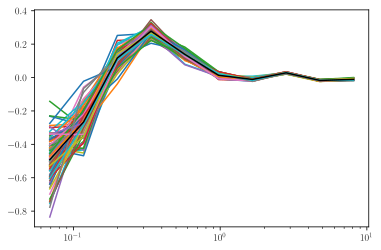

In [12]:
i = 0
prof = ACP_optm_rands[i]

fig = plt.figure()
ax = fig.add_subplot(111)

for i in np.arange(100):
    ax.plot(prof.rr, prof.profile.dst_sub[:, i])
ax.plot(prof.rr, prof.profile.dst, color="black")
ax.set_xscale("log")


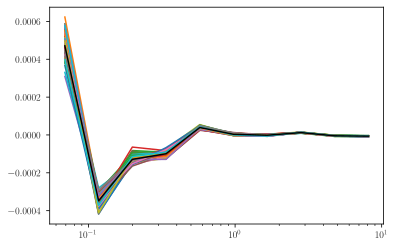

In [13]:
i = 0
j = 0


fig = plt.figure()
ax = fig.add_subplot(111)
prof = ACP_optm_rands[i]._profiles[j]
for i in np.arange(100):
    ax.plot(prof.rr, prof.dst_sub[:, i])
ax.plot(prof.rr, prof.dst, color="black")
ax.set_xscale("log")

In [46]:
ACP_optm_rands

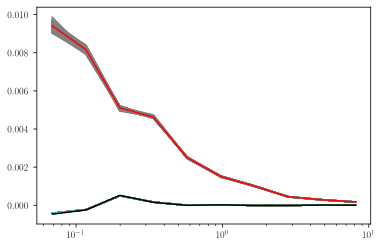

In [64]:
i = 0
j = 1


fig = plt.figure()
ax = fig.add_subplot(111)

prof = ACP_optms[i]._profiles[j]
for l in np.arange(100):
    ax.plot(prof.rr, prof.dst_sub[:, l], color="gray")
ax.plot(prof.rr, prof.dst, color="red")
# ax.set_xscale("log")

prof = ACP_optm_rands[i]._profiles[j]
for i in np.arange(100):
    ax.plot(prof.rr, prof.dst_sub[:, j])
ax.plot(prof.rr, prof.dst, color="black")
ax.set_xscale("log")

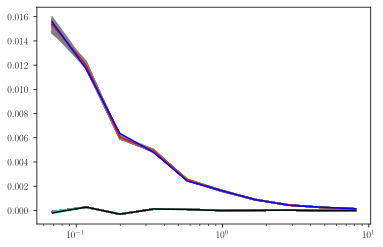

In [53]:
i = 0
j = 2


fig = plt.figure()
ax = fig.add_subplot(111)

prof = ACP_optms[i]._profiles[j]
for l in np.arange(100):
    ax.plot(prof.rr, prof.dst_sub[:, l], color="gray")
ax.plot(prof.rr, prof.dst, color="red")
# ax.set_xscale("log")

prof = ACP_optm_rands[i]._profiles[j]
for l in np.arange(100):
    ax.plot(prof.rr, prof.dst_sub[:, j])
ax.plot(prof.rr, prof.dst, color="black")
ax.set_xscale("log")

prof1 = ACP_optms[i]._profiles[j]
prof2 = ACP_optm_rands[i]._profiles[j]
prof1.composite(prof2, operation="-")
ax.plot(prof1.rr, prof1.dst, color="blue")


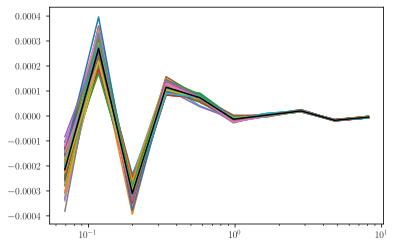

In [41]:
i = 0
j = 2


fig = plt.figure()
ax = fig.add_subplot(111)
prof = ACP_optm_rands[i]._profiles[j]
for i in np.arange(100):
    ax.plot(prof.rr, prof.dst_sub[:, i])
ax.plot(prof.rr, prof.dst, color="black")
ax.set_xscale("log")